# Clustering Assignment

### Problem Statement: 

To analyse the facts and figures in dataset of Countries, HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. Now decision of  how to use this money strategically and effectively providing countries who need AID. 

### Importing libraries 

In [113]:
# Filtering out the warnings 
import warnings
warnings.filterwarnings('ignore')

# Importing the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Reading and Inspecting the dataframe

In [114]:
#reading the csv files
app = pd.read_csv("Country-data.csv")
app

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [115]:
app.shape

(167, 10)

In [116]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [117]:
app.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [118]:
# null check of all columns
app.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [119]:
app.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Data Preparation

In [120]:
# converting columns to actual values from %age of gdpp
app["exports"] = app['exports']*app['gdpp']/100
app["imports"] = app['imports']*app['gdpp']/100
app["health"] = app['health']*app['gdpp']/100
app.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [121]:
#initial set of countries for required situation
app.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231
88,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399
93,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459
50,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482


### EDA

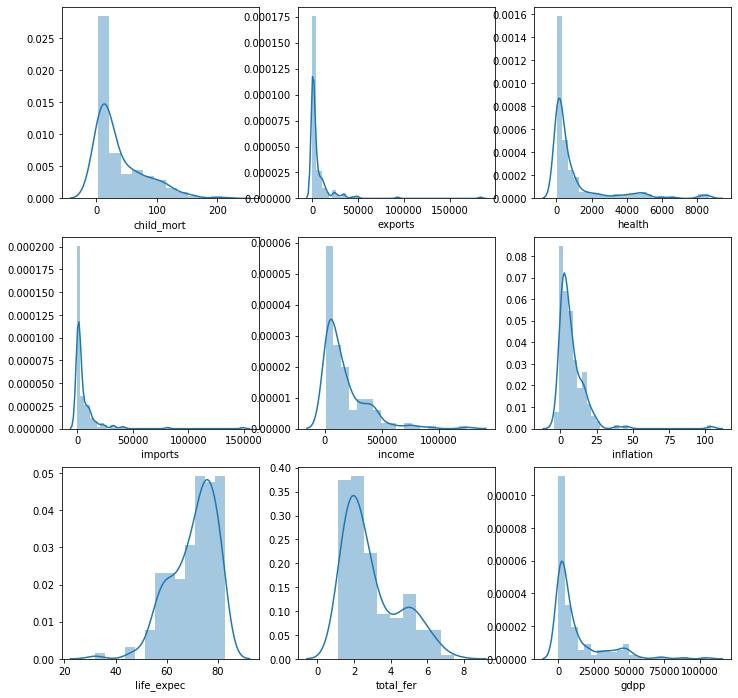

In [122]:
# univarate analysis
plt.figure(figsize = (12,12))
f = app.columns[1:]
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.distplot(app[i[1]])

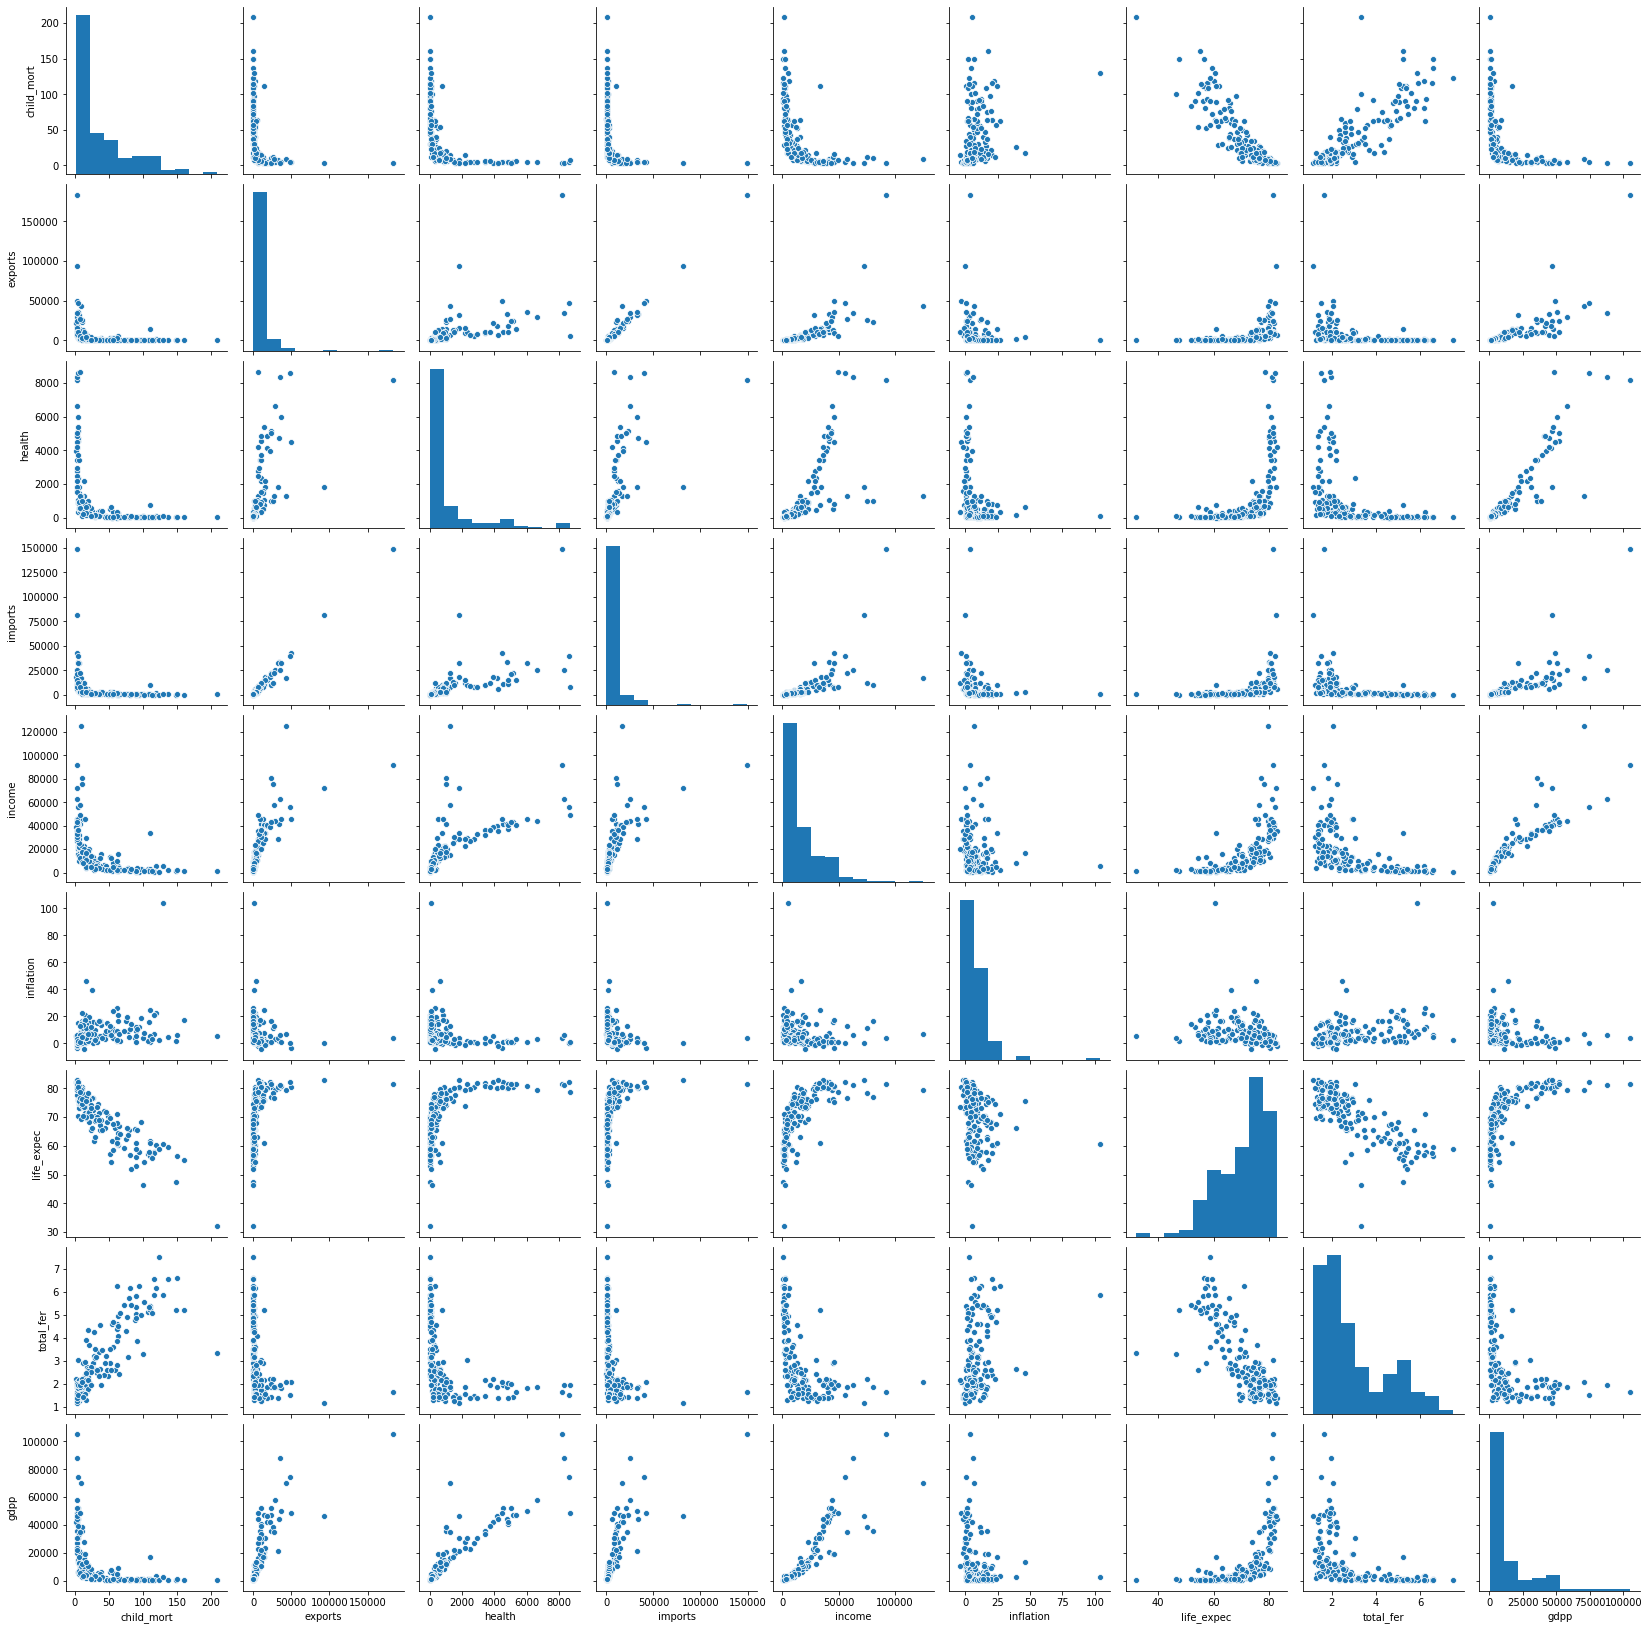

In [123]:
#visualizing numerical value
sns.pairplot(app)

In [124]:
# Correlation Matrix
app_cor = app.corr()
app_cor

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
child_mort,1.000000,-0.297230,-0.430438,-0.319138,-0.524315,0.288276,-0.886676,0.848478,-0.483032
exports,-0.297230,1.000000,0.612919,0.987686,0.725351,-0.141553,0.377694,-0.291096,0.768894
health,-0.430438,0.612919,1.000000,0.638581,0.690857,-0.253956,0.545626,-0.407984,0.916593
imports,-0.319138,0.987686,0.638581,1.000000,0.672056,-0.179458,0.397515,-0.317061,0.755114
income,-0.524315,0.725351,0.690857,0.672056,1.000000,-0.147756,0.611962,-0.501840,0.895571
inflation,0.288276,-0.141553,-0.253956,-0.179458,-0.147756,1.000000,-0.239705,0.316921,-0.221631
life_expec,-0.886676,0.377694,0.545626,0.397515,0.611962,-0.239705,1.000000,-0.760875,0.600089
total_fer,0.848478,-0.291096,-0.407984,-0.317061,-0.501840,0.316921,-0.760875,1.000000,-0.454910
gdpp,-0.483032,0.768894,0.916593,0.755114,0.895571,-0.221631,0.600089,-0.454910,1.000000


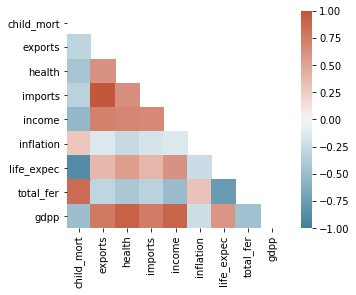

In [125]:
# heatmap of correlation matrix
mask = np.triu(np.ones_like(app_cor, dtype=np.bool))
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(app_cor, mask = mask,  cmap=cmap,vmin= -1, vmax=1, center=0,
            square=True)

#### Inference

- Imports Exports increases simulataneously
- As GDP grows health and income are most highly correlated
- Fertility and child moratlity gets infected directly by life_expectancy

likewise if life expectancy increase child mortality decreases.



### Outlier Treatment


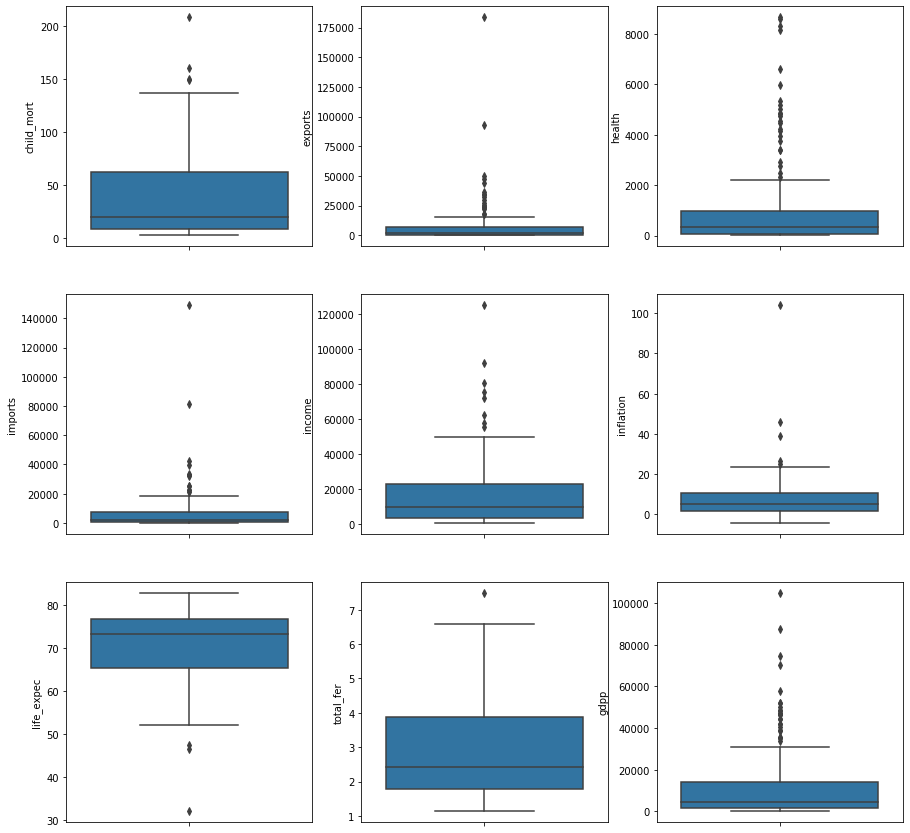

In [126]:
# To plot the box plot for all the columns
plt.figure(figsize = (15,15))
for i in enumerate(f):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(y = i[1], data =app)

All variables have outliers on the upper side (higher values) except for life_expec which has outliers on the down side (less values) indicating that usually the life expectancy in most countries is above 50 except for 3 countries.

#### capping the outliers

for child_mort, inflation, total_fer we will do lower range outliers capping,
but for other columns will do upper range capping as
capping outliers for respective columns may temper the actual insights

In [127]:
def describe_column(dfs, col_names):
    for df in dfs:
        for col in col_names:
            print(df[col].describe().apply(lambda x: format(x, 'f')))
            print(df[col].quantile([0.90,0.95,0.98,0.99,1]),'\n\n')

In [128]:
# columns quantile value
describe_column([app],f)

count    167.000000
mean      38.270060
std       40.328931
min        2.600000
25%        8.250000
50%       19.300000
75%       62.100000
max      208.000000
Name: child_mort, dtype: object
0.90    100.22
0.95    116.00
0.98    145.16
0.99    153.40
1.00    208.00
Name: child_mort, dtype: float64 


count       167.000000
mean       7420.618847
std       17973.885795
min           1.076920
25%         447.140000
50%        1777.440000
75%        7278.000000
max      183750.000000
Name: exports, dtype: object
0.90     17760.600
0.95     31385.100
0.98     46480.928
0.99     64794.260
1.00    183750.000
Name: exports, dtype: float64 


count     167.000000
mean     1056.733204
std      1801.408906
min        12.821200
25%        78.535500
50%       321.886000
75%       976.940000
max      8663.600000
Name: health, dtype: object
0.90    3825.4160
0.95    4966.7010
0.98    7663.6200
0.99    8410.3304
1.00    8663.6000
Name: health, dtype: float64 


count       167.000000
mean       6588

In [129]:
# capping values as per lower outliers
q1a = app['imports'].quantile(0.05)
q1b = app['exports'].quantile(0.05)

app['imports'][app['imports']<=q1a] = q1a
app['exports'][app['exports']<=q1b] = q1b

In [130]:
# capping values as per upper outliers
q4a = app['inflation'].quantile(0.99)
qa = app['exports'].quantile(0.95)
qb = app['health'].quantile(0.95)
qc = app['imports'].quantile(0.95)
qd = app['income'].quantile(0.95)
qe = app['gdpp'].quantile(0.99)

app['exports'][app['exports']>=qa] = qa
app['health'][app['health']>=qb] = qb
app['imports'][app['imports']>=qc] = qc
app['income'][app['income']>=qd] = qd
app['gdpp'][app['gdpp']>=qe] = qe
app['inflation'][app['inflation']>=q4a] = q4a

In [131]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

#### Hopkins test

In [132]:
# calculating value for hospkins
hopkins(app.drop("country", axis=1))

0.8851925209343338

for 10 iteration of hopkins test value is greater than .85 
Thus, data is good for clustering.

### Scaling

In [133]:
# Scaling of the numerical features
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df1 = ss.fit_transform(app.drop("country", axis = 1))
df1

array([[ 1.29153238, -0.66803864, -0.62943544, ..., -1.61909203,
         1.90288227, -0.70225949],
       [-0.5389489 , -0.54238923, -0.47348864, ...,  0.64786643,
        -0.85997281, -0.49872564],
       [-0.27283273, -0.47604845, -0.53001667, ...,  0.67042323,
        -0.0384044 , -0.47743428],
       ...,
       [-0.37231541, -0.56600553, -0.59652699, ...,  0.28695762,
        -0.66120626, -0.65869853],
       [ 0.44841668, -0.63033074, -0.61153387, ..., -0.34463279,
         1.14094382, -0.65869853],
       [ 1.11495062, -0.61312123, -0.59901824, ..., -2.09278484,
         1.6246091 , -0.6500669 ]])

In [134]:
# mapping column names to scaled data
df1 = pd.DataFrame(df1)
df1.columns = app.columns[1:]
df1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-0.668039,-0.629435,-0.733291,-0.958349,0.265002,-1.619092,1.902882,-0.702259
1,-0.538949,-0.542389,-0.473489,-0.472674,-0.394006,-0.372075,0.647866,-0.859973,-0.498726
2,-0.272833,-0.476048,-0.530017,-0.560668,-0.192552,1.122161,0.670423,-0.038404,-0.477434
3,2.007808,-0.419165,-0.588935,-0.543598,-0.667360,1.932987,-1.179234,2.128151,-0.530950
4,-0.695634,-0.027297,-0.150685,0.306143,0.227992,-0.764618,0.704258,-0.541946,-0.032042


### finding the best value of K

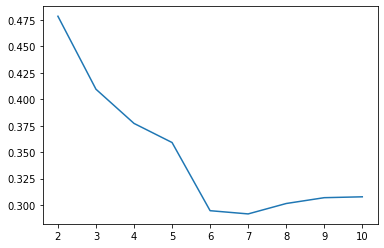

In [135]:
# plotting silhouette_score for finding cluster
from sklearn.metrics import silhouette_score

ss = []
for k in range(2,11):
    kmeans = KMeans(n_clusters = k).fit(df1)
    ss.append([k, silhouette_score(df1, kmeans.labels_)])
    
sil = pd.DataFrame(ss)
plt.plot(sil[0],sil[1])

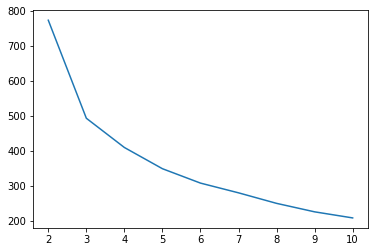

In [136]:
# ssd elbow curve
ssd = []
for k in range(2,11):
    kmean = KMeans(n_clusters = k).fit(df1)
    ssd.append([k, kmean.inertia_])

ssd = pd.DataFrame(ssd)
plt.plot(ssd[0], ssd[1])

#### final Kmeans with K == 3

In [137]:
# kmeans for 3 clusters 
kmean = KMeans(n_clusters = 3, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [138]:
kmean.labels_

array([1, 0, 0, 1, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1,
       0, 2, 0, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 2, 0, 0, 1, 1, 0,
       1, 0, 2, 0, 0, 0, 1, 2, 2, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       1, 0, 0, 2, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       2, 2, 1, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 0, 2, 2, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1])

In [139]:
df = app

In [140]:
# mapping labels to dataset 
df["cluster_id"] = kmean.labels_

In [141]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [142]:
# Let's check how may data points we have in each cluster
df.cluster_id.value_counts()

0    82
1    48
2    37
Name: cluster_id, dtype: int64

### Plotting 

plotting for
- GDPP
- Income
- Child_Mort

as there distplot and significance looks more promising for clustering

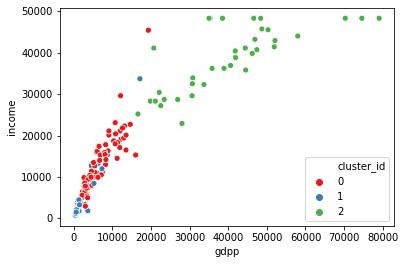

In [143]:
# mapping profiling variables to each other
sns.scatterplot(x ='gdpp', y ='income', hue = 'cluster_id', data =df, palette = 'Set1')

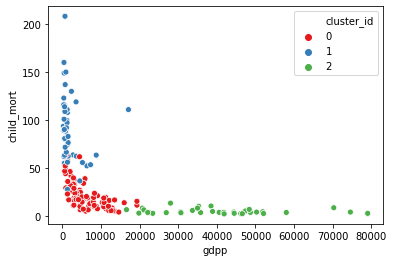

In [144]:
sns.scatterplot(x ='gdpp', y ='child_mort', hue = 'cluster_id', data =df, palette = 'Set1')

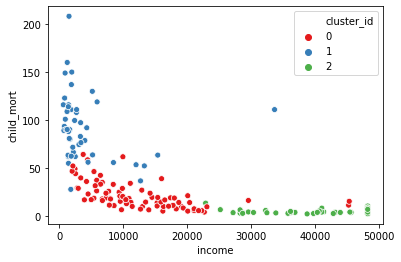

In [145]:
sns.scatterplot(x ='income', y ='child_mort', hue = 'cluster_id', data =df, palette = 'Set1')

#### finding clusters for which we have LOW GDPP, LOW INCOME and HIGH CHILD_MORT

In [146]:
# means of required column
df[['gdpp','income','child_mort','cluster_id']].groupby("cluster_id").mean()

,gdpp,income,child_mort
cluster_id,,,
0,6287.463415,12304.756098,21.951220
1,1909.208333,3897.354167,91.610417
2,41166.918919,38711.081081,5.237838


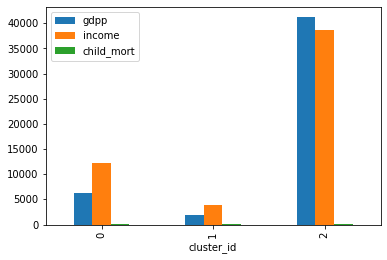

In [147]:
df[['gdpp','income','child_mort','cluster_id']].groupby("cluster_id").mean().plot(kind='bar')

Using the above chart about clusters, drawing the following inferences:

- Cluster 0 has low GDP, income and high child_mort Thus, they may need treatment.
- Cluster 1 has lowest income, GDP and highest child_mort and GDP than others indicating these countries have stunted growth and need aid.
- Cluster 3 has highest income, GDP and lowest child_mort indicating these countries are developed and does not need aid.- 

In [148]:
c1 = df[df['cluster_id']==1]
c1.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1


In [149]:
 c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,70.4688,26.7960,169.281,764.0,12.30,57.7,6.26,231.0,1
88,Liberia,89.3,70.4688,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,169.281,609.0,20.80,57.5,6.54,334.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
132,Sierra Leone,160.0,70.4688,52.2690,169.281,1220.0,17.20,55.0,5.20,399.0,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1
31,Central African Republic,149.0,70.4688,17.7508,169.281,888.0,2.01,47.5,5.21,446.0,1
94,Malawi,90.5,104.6520,30.2481,169.281,1030.0,12.10,53.1,5.31,459.0,1
50,Eritrea,55.2,70.4688,12.8212,169.281,1420.0,11.60,61.7,4.61,482.0,1


### for k==4 

In [150]:
# kmeans for 4 clusters 
kmean = KMeans(n_clusters = 4, random_state = 0)
kmean.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [151]:
kmean.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 1, 0, 3, 3, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 1, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 3,
       1, 0, 0, 0, 0, 2, 2, 3, 0, 1, 3, 2, 2, 0, 1, 2, 3, 0, 0, 2, 2, 0,
       2, 3, 1, 0, 0, 0, 2, 1, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       1, 3, 2, 2, 1, 3, 2, 0, 0, 0, 0, 0, 3, 1, 0, 0, 2, 0, 3, 2, 0, 3,
       2, 1, 3, 3, 2, 2, 3, 3, 0, 0, 2, 0, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 1, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [152]:
# mapping labels to dataset 
df["cluster_id4"] = kmean.labels_

In [153]:
# Let's check how may data points we have in each cluster
df.cluster_id4.value_counts()

0    77
2    48
3    25
1    17
Name: cluster_id4, dtype: int64

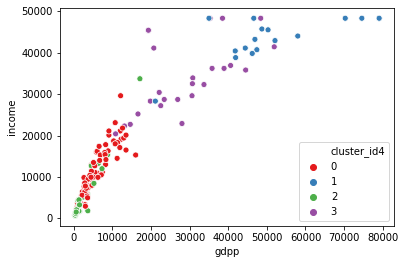

In [154]:
# mapping profiling variables to each other
sns.scatterplot(x ='gdpp', y ='income', hue = 'cluster_id4', data =df, palette = 'Set1')


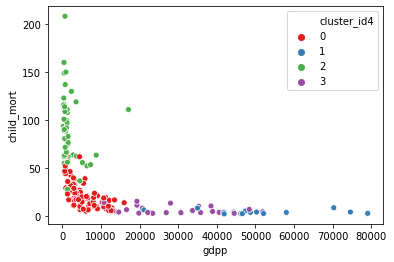

In [155]:
sns.scatterplot(x ='gdpp', y ='child_mort', hue = 'cluster_id4', data =df, palette = 'Set1')


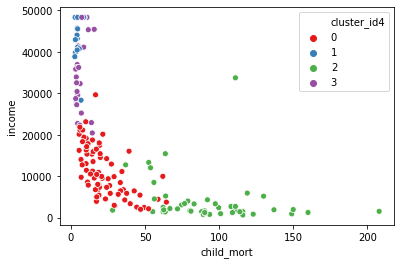

In [156]:
sns.scatterplot(x ='child_mort', y ='income', hue = 'cluster_id4', data =df, palette = 'Set1')

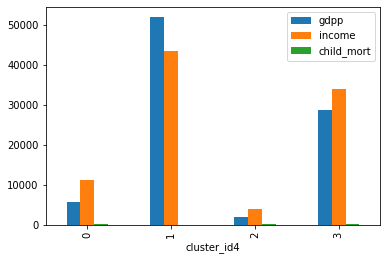

In [157]:
df[['gdpp','income','child_mort','cluster_id4']].groupby("cluster_id4").mean().plot(kind='bar')

Using the above chart about clusters, drawing the following inferences:

- Cluster 0 has low income , GDPP and high child_mort than others indicating these countries have stunted growth and may need aid.
- Cluster 1 has highest GDPP, income and lowest child_mort indicating these countries are developed and does not need aid.
- Cluster 2 has lowest GDPP, income and highest child_mort. Thus, they dont need much treatment.
- Cluster 3 has good income, GDP and low child_mort. Thus, they dont need much treatment.

In [158]:
c2 = df[df['cluster_id4']==2]
c2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id4
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1,2
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300.0,8.920,57.1,2.88,6350.0,1,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1,2


In [159]:
 c2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id4
26,Burundi,93.6,70.4688,26.7960,169.281,764.0,12.30,57.7,6.26,231.0,1,2
88,Liberia,89.3,70.4688,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1,2
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,169.281,609.0,20.80,57.5,6.54,334.0,1,2
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1,2
132,Sierra Leone,160.0,70.4688,52.2690,169.281,1220.0,17.20,55.0,5.20,399.0,1,2
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1,2
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1,2
31,Central African Republic,149.0,70.4688,17.7508,169.281,888.0,2.01,47.5,5.21,446.0,1,2
94,Malawi,90.5,104.6520,30.2481,169.281,1030.0,12.10,53.1,5.31,459.0,1,2
50,Eritrea,55.2,70.4688,12.8212,169.281,1420.0,11.60,61.7,4.61,482.0,1,2


## Hierarchical Clustering

In [160]:
# importing some libraries
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

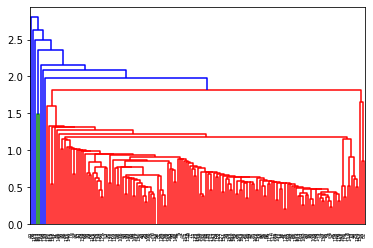

In [161]:
# single linkage
sapp = linkage(df1,method='single', metric='euclidean')
dendrogram(sapp)
plt.show()

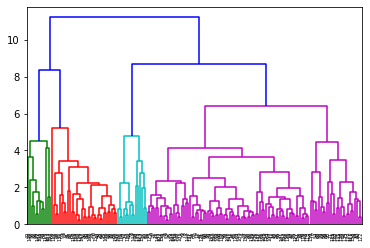

In [162]:
# complete linkage
sapp = linkage(df1,method='complete', metric='euclidean')
dendrogram(sapp)
plt.show()

In [163]:
cluster_labels = cut_tree(sapp,n_clusters=3).reshape(-1,)
cluster_labels

array([0, 1, 1, 0, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       2, 1, 0, 0, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 1, 1, 1, 1, 1, 0, 1, 0, 0])

In [164]:
# mapping cluster labels for hierarchial clustering to dataframe 
df["cluster_labels"] = cluster_labels
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id4,cluster_labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,1,2,0
1,Albania,16.6,1145.2000,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0,0,1
2,Algeria,27.3,1712.6400,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0,0,1
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,1,2,0
4,Antigua and Barbuda,10.3,5551.0000,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0,0,1


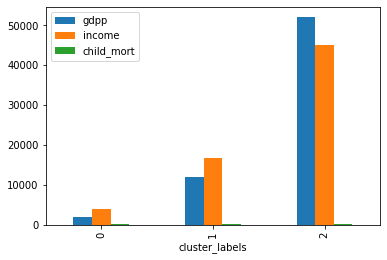

In [165]:
# plotting clusters for required columns
df[['gdpp','income','child_mort','cluster_labels']].groupby("cluster_labels").mean().plot(kind='bar')

In [166]:
# checking values for cluster 0 to according to condition
c3 = df[df['cluster_labels']==0]
c3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id4,cluster_labels
0,Afghanistan,90.2,70.4688,41.9174,248.297,1610.0,9.440,56.2,5.82,553.0,1,2,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900.0,22.400,60.1,6.16,3530.0,1,2,0
17,Benin,111.0,180.4040,31.0780,281.976,1820.0,0.885,61.8,5.36,758.0,1,2,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430.0,6.810,57.9,5.87,575.0,1,2,0
26,Burundi,93.6,70.4688,26.7960,169.281,764.0,12.300,57.7,6.26,231.0,1,2,0


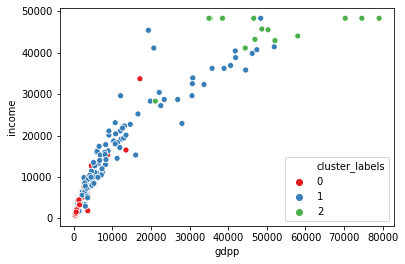

In [167]:
# mapping profiling variables to each other
sns.scatterplot(x ='gdpp', y ='income', hue = 'cluster_labels', data =df, palette = 'Set1')

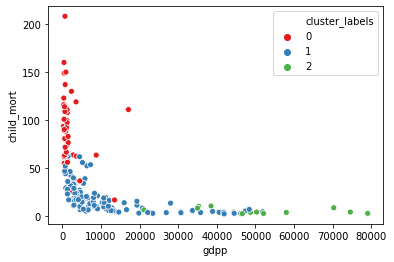

In [168]:
sns.scatterplot(x ='gdpp', y ='child_mort', hue = 'cluster_labels', data =df, palette = 'Set1')

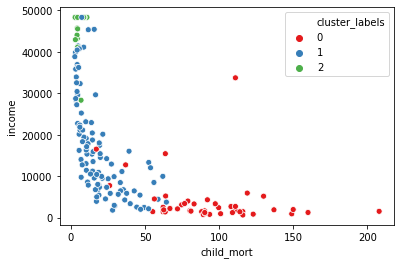

In [169]:
sns.scatterplot(x ='child_mort', y ='income', hue = 'cluster_labels', data =df, palette = 'Set1')

#### finding clusters for which we have LOW GDPP, LOW INCOME and HIGH CHILD_MORT

In [170]:
# By hierarchial 
h_cluster = c3.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
h_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id,cluster_id4,cluster_labels
26,Burundi,93.6,70.4688,26.7960,169.281,764.0,12.30,57.7,6.26,231.0,1,2,0
88,Liberia,89.3,70.4688,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1,2,0
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,169.281,609.0,20.80,57.5,6.54,334.0,1,2,0
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1,2,0
132,Sierra Leone,160.0,70.4688,52.2690,169.281,1220.0,17.20,55.0,5.20,399.0,1,2,0
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1,2,0
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1,2,0
31,Central African Republic,149.0,70.4688,17.7508,169.281,888.0,2.01,47.5,5.21,446.0,1,2,0
94,Malawi,90.5,104.6520,30.2481,169.281,1030.0,12.10,53.1,5.31,459.0,1,2,0
50,Eritrea,55.2,70.4688,12.8212,169.281,1420.0,11.60,61.7,4.61,482.0,1,2,0


In [171]:
# By K means k==3
k_cluster= c1.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
k_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,70.4688,26.7960,169.281,764.0,12.30,57.7,6.26,231.0,1
88,Liberia,89.3,70.4688,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,169.281,609.0,20.80,57.5,6.54,334.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
132,Sierra Leone,160.0,70.4688,52.2690,169.281,1220.0,17.20,55.0,5.20,399.0,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1
31,Central African Republic,149.0,70.4688,17.7508,169.281,888.0,2.01,47.5,5.21,446.0,1
94,Malawi,90.5,104.6520,30.2481,169.281,1030.0,12.10,53.1,5.31,459.0,1
50,Eritrea,55.2,70.4688,12.8212,169.281,1420.0,11.60,61.7,4.61,482.0,1


In [172]:
# By K means k==4
k_cluster4= c2.sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True, False, True]).head(10)
k_cluster

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_id
26,Burundi,93.6,70.4688,26.7960,169.281,764.0,12.30,57.7,6.26,231.0,1
88,Liberia,89.3,70.4688,38.5860,302.802,700.0,5.47,60.8,5.02,327.0,1
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,169.281,609.0,20.80,57.5,6.54,334.0,1
112,Niger,123.0,77.2560,17.9568,170.868,814.0,2.55,58.8,7.49,348.0,1
132,Sierra Leone,160.0,70.4688,52.2690,169.281,1220.0,17.20,55.0,5.20,399.0,1
93,Madagascar,62.2,103.2500,15.5701,177.590,1390.0,8.79,60.8,4.60,413.0,1
106,Mozambique,101.0,131.9850,21.8299,193.578,918.0,7.64,54.5,5.56,419.0,1
31,Central African Republic,149.0,70.4688,17.7508,169.281,888.0,2.01,47.5,5.21,446.0,1
94,Malawi,90.5,104.6520,30.2481,169.281,1030.0,12.10,53.1,5.31,459.0,1
50,Eritrea,55.2,70.4688,12.8212,169.281,1420.0,11.60,61.7,4.61,482.0,1


In [173]:
h_cluster.country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [174]:
k_cluster.country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

In [176]:
k_cluster4.country

26                      Burundi
88                      Liberia
37             Congo, Dem. Rep.
112                       Niger
132                Sierra Leone
93                   Madagascar
106                  Mozambique
31     Central African Republic
94                       Malawi
50                      Eritrea
Name: country, dtype: object

### List of Countries that are in need of the AID - 

#### Common in both the clusters: (k==3, k==4, hierarchical)
- Burundi
- Liberia
- Congo, Dem. Rep
- Niger
- Sierra Leone
- Mozambique
- Central African Republic
- Malawi
- Eritrea
- Madagascar